In [1]:
import sys
import numpy as np
import math
sys.path.append("../build/python")  # set to correct path for module
import varttpy

In [2]:
## IRLM model
L=30
t=1
V=0.15
U=-0.5

## Kinetic energy TB Hamiltonian
K=np.zeros((L,L))
for i in range(1,L-1):
    K[i,i+1]=K[i+1,i]=t

K[0,1]=K[1,0]=V

## U ni nj
Umat=np.zeros((L,L))
Umat[0,1]=U
K[0,0]=K[1,1]=-U/2

Vijkl={}
    
model = varttpy.Fermionic(K,Umat,Vijkl)
H=model.Ham()
print("H: ",[M.shape[-1] for M in H.cores])

H:  [4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 1]


In [3]:
sol=varttpy.DMRG(H)
sol.bond_dim=128
sol.nIter_diag=32
Npart=model.NParticle();
print("sweep energy Npart")
eners=[]
for i in range(6):
    sol.iterate()
    print(i+1, sol.energy, sol.Expectation(Npart))
    eners += [sol.energy]

variance_rel=sol.H2(4*sol.bond_dim)/sol.energy**2-1
print("H^2/E^2-1=", variance_rel)

sweep energy Npart
1 -17.982958974056533 15.001884413305353
2 -17.99795592489754 15.000000007846827
3 -17.997956407944866 14.999999999999686
4 -17.997956407944926 14.999999999999748
5 -17.99795640794479 14.999999999999655
6 -17.997956407945033 14.99999999999977
H^2/E^2-1= 7.502887200416808e-13


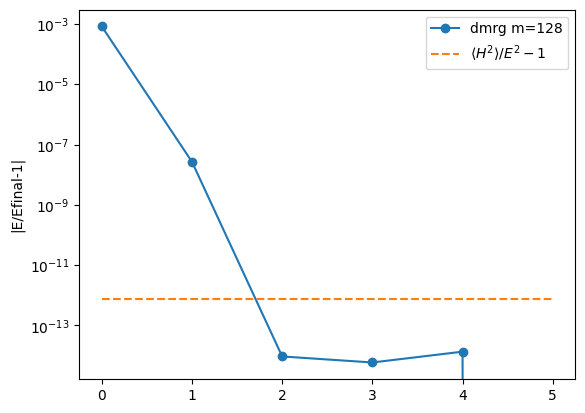

In [4]:
import matplotlib.pyplot as plt
plt.yscale('log')
eRef=np.min(eners)
plt.ylabel("|E/Efinal-1|")
plt.plot([abs(x/eRef-1) for x in eners], '-o', label=f'dmrg m={sol.bond_dim}')
plt.plot([variance_rel for x in eners], '--', label="$\\langle H^2 \\rangle /E^2-1$")
plt.legend()

In [5]:
cc=np.zeros((L,L))
for i in range(L):
    for j in range(i,L):
        cc[i,j]=cc[j,i]=sol.Expectation(model.CidCj(i,j))
eval=np.sort( np.linalg.eigvals(cc) )

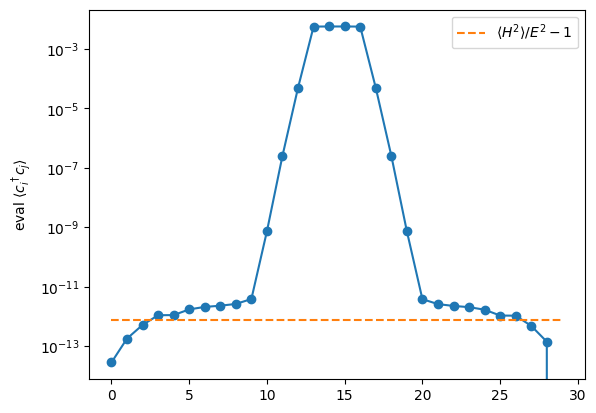

In [6]:
import matplotlib.pyplot as plt
plt.ylabel('eval $ \\langle c_i^\dagger c_j \\rangle$')
plt.yscale('log')
plt.plot([min(x,1-x) for x in eval], '-o')
plt.plot([variance_rel for x in eval], '--', label="$\\langle H^2 \\rangle /E^2-1$")
plt.legend()

In [7]:
print("Npart=",sol.Expectation(Npart))
print("H2-E^2 sigma/E")
ener=sol.Expectation(model.Ham())
m=sol.bond_dim
for mi in [m//2, m, 2*m, 3*m, 4*m]:
    print(sol.H2(mi)/ener**2-1, sol.sigma(mi)/sol.energy  )

Npart= 14.99999999999977
H2-E^2 sigma/E
1.4016036553599065e-08 -5.136091603995516e-09
1.0061729227572869e-11 -1.943139372350239e-08
7.693845560652335e-13 -8.569074458566162e-07
7.576161920042068e-13 -8.746399447783479e-07
7.567280135845067e-13 -8.74639944777257e-07
